<a href="https://colab.research.google.com/github/AnahitaNouri/Machine-Learning-Project/blob/main/Machine_Learning___Winter_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Disease_symptom_and_patient_profile_dataset.csv")

In [10]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [12]:
df.describe()

,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


In [13]:
df.describe(include='object')

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
count,349,349,349,349,349,349,349,349,349
unique,116,2,2,2,2,2,3,3,2
top,Asthma,Yes,No,Yes,No,Female,High,High,Positive
freq,23,175,182,242,261,176,167,166,186


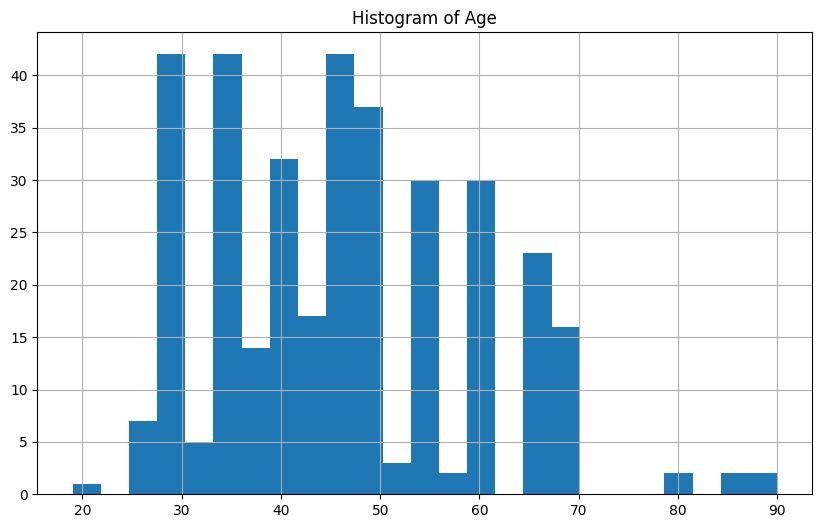

In [14]:
# Histogram

df.hist( bins=25 ,figsize=(10,6))
plt.title("Histogram of Age")
plt.show()

In [15]:
df.isna().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [16]:
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

In [17]:
df.shape

(349, 10)

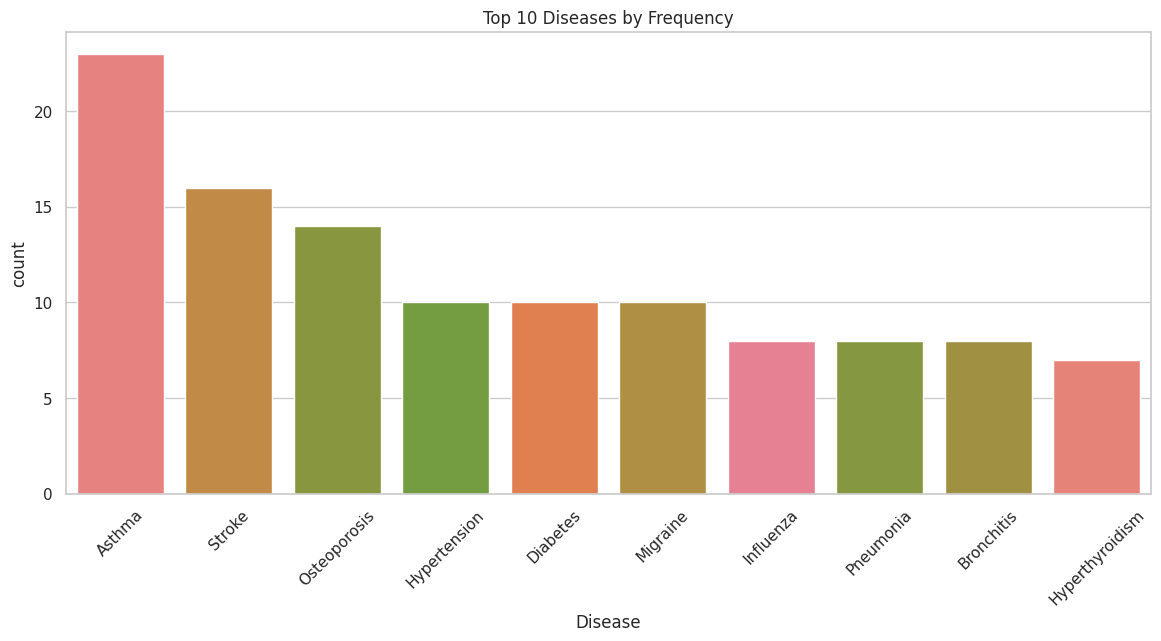

In [18]:
# Set the style for the plots
sns.set(style="whitegrid")

# Countplot for top 10 Disease distribution
plt.figure(figsize=(14, 6))
top_10_diseases = df['Disease'].value_counts().nlargest(10).index
sns.countplot(x='Disease', data=df, order=top_10_diseases , hue ='Disease')
plt.xticks(rotation=45)
plt.title('Top 10 Diseases by Frequency')
plt.show()


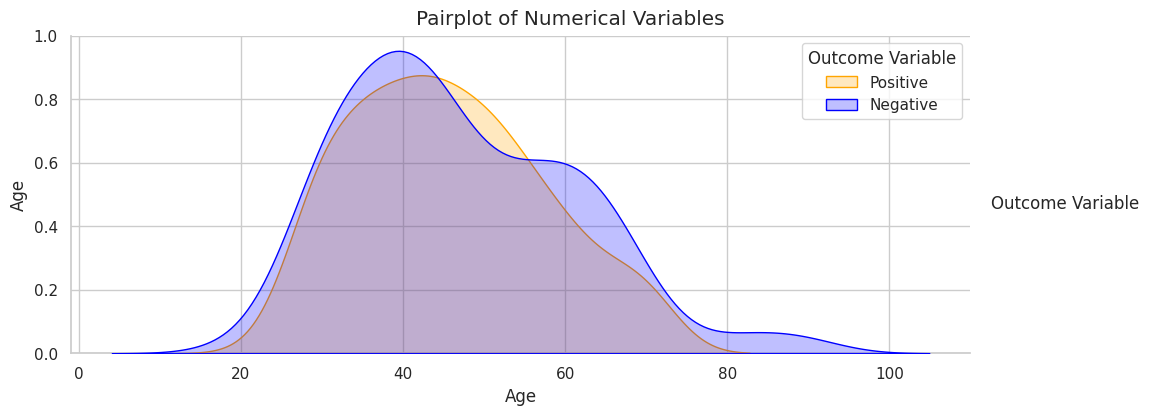

In [19]:
# Pairplot to visualize relationships between numerical variables
pairplot = sns.pairplot(df, hue='Outcome Variable', diag_kind='kde', height=4, aspect=2.5, palette={'Positive': 'blue', 'Negative': 'orange'})
pairplot.fig.suptitle('Pairplot of Numerical Variables', y=1.02)

# Add manual legend
plt.legend(title='Outcome Variable', labels=['Positive', 'Negative'], loc='upper right')

plt.show()

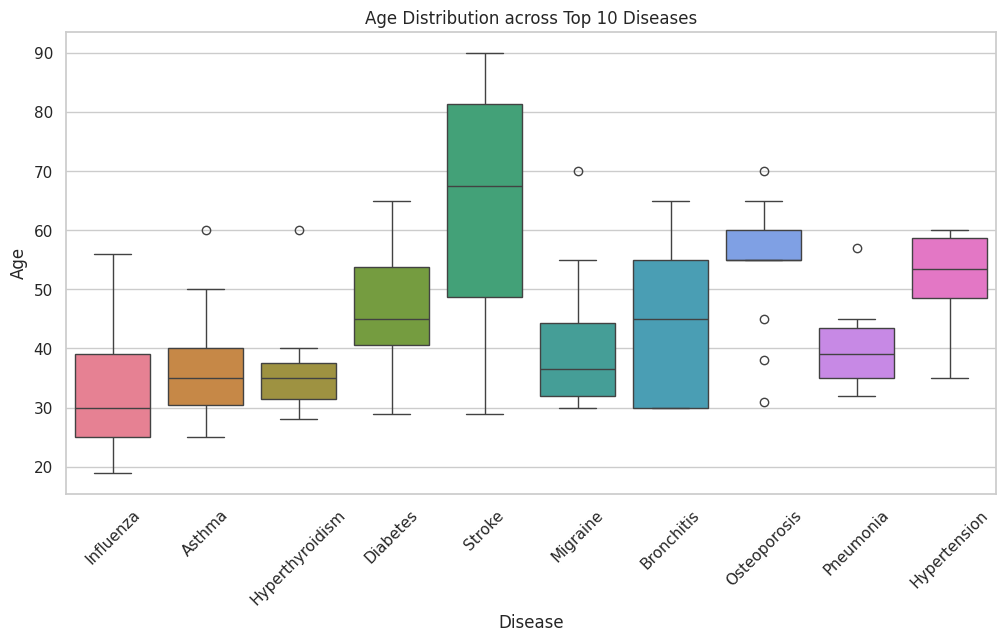

In [20]:
# Select top 10 diseases based on frequency
top_10_diseases = df['Disease'].value_counts().nlargest(10).index

# Filter the dataframe for top 10 diseases
df_top_10 = df[df['Disease'].isin(top_10_diseases)]

# Boxplot for Age distribution across top 10 diseases
plt.figure(figsize=(12, 6))
sns.boxplot(x='Disease', y='Age', data=df_top_10 , hue = 'Disease' , palette="husl")
plt.xticks(rotation=45)
plt.title('Age Distribution across Top 10 Diseases')
plt.show()


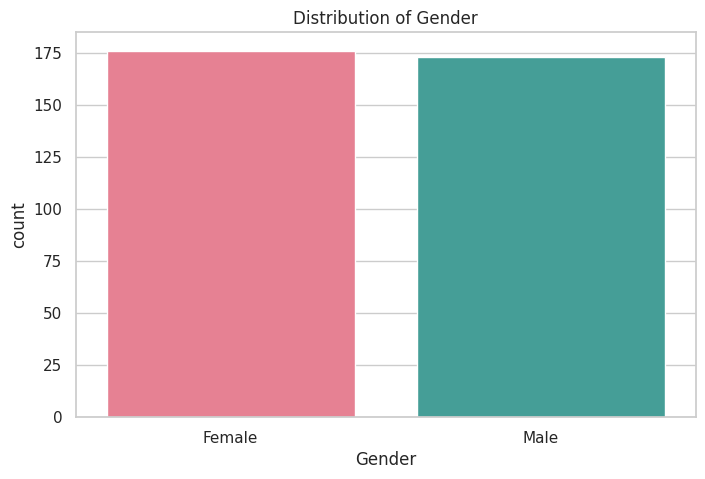

In [21]:
# Countplot for Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df , hue='Gender' , palette="husl")
plt.title('Distribution of Gender')
plt.show()

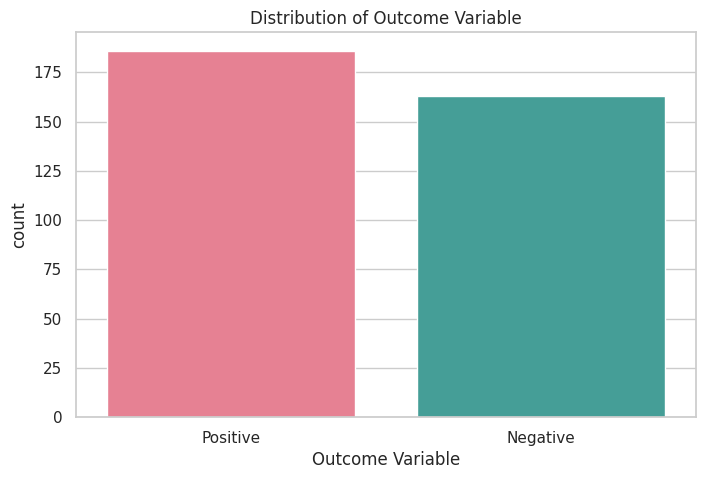

In [22]:
# Countplot for Outcome Variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome Variable', data=df, hue='Outcome Variable' , palette="husl")
plt.title('Distribution of Outcome Variable')
plt.show()

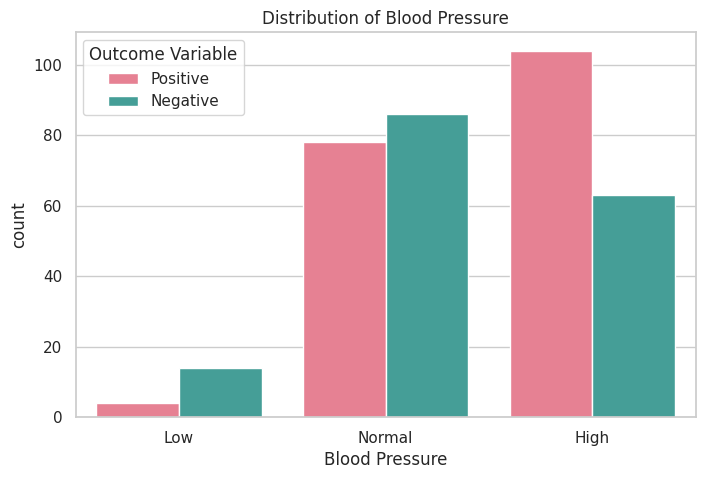

In [23]:
# Countplot for Blood Pressure distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Blood Pressure', data=df, hue='Outcome Variable', palette="husl")
plt.title('Distribution of Blood Pressure')
plt.show()

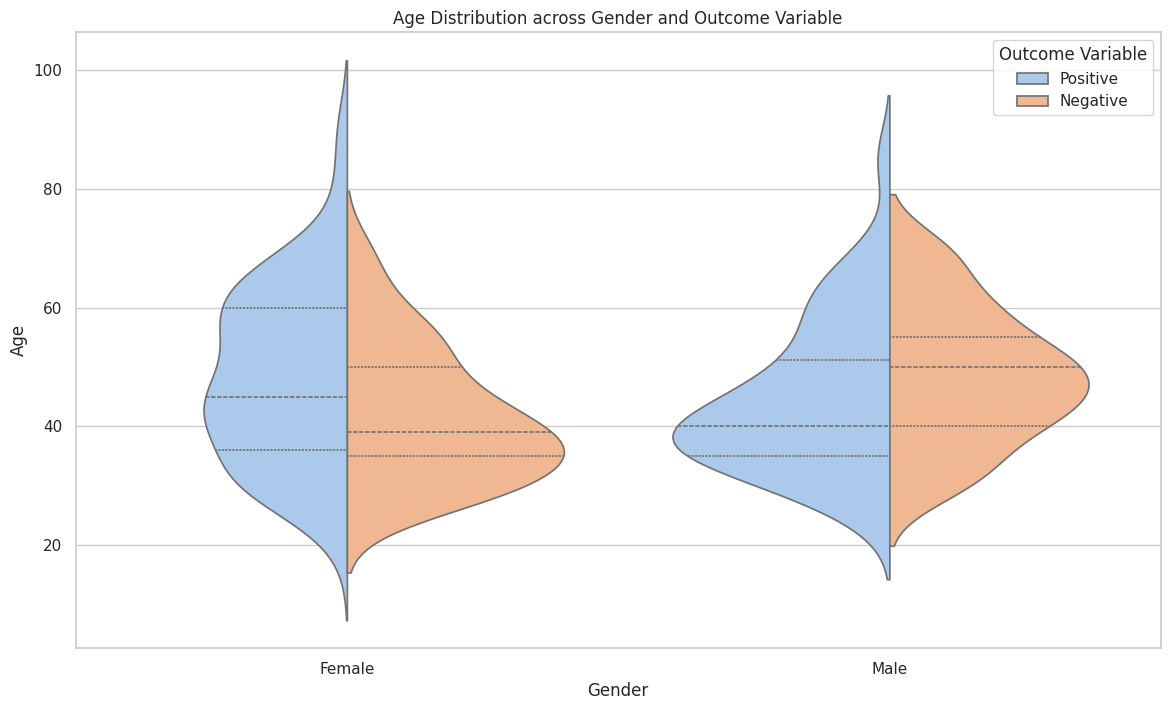

In [24]:
# Violin plot of age distribution across Gender and Outcome Variable
plt.figure(figsize=(14, 8))
sns.violinplot(x='Gender', y='Age', hue='Outcome Variable', data=df, split=True, inner='quart', palette="pastel")
plt.title('Age Distribution across Gender and Outcome Variable')
plt.show()


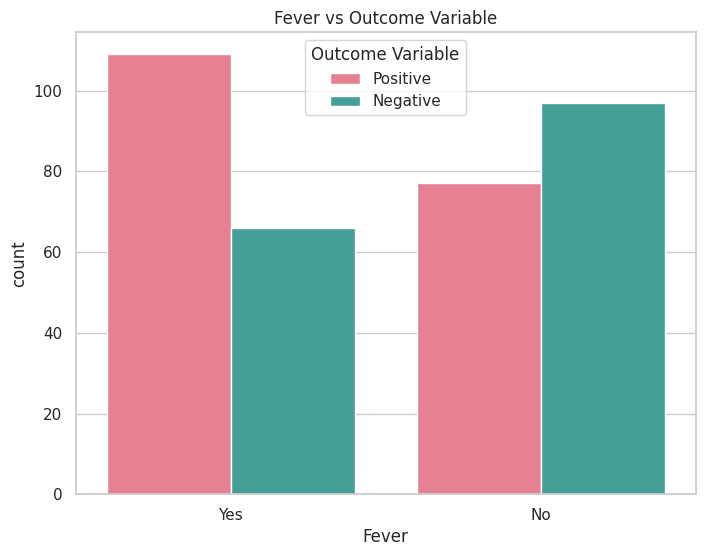

In [25]:
# Countplot for Fever vs Outcome Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Fever', hue='Outcome Variable', data=df ,palette="husl")
plt.title('Fever vs Outcome Variable')
plt.show()


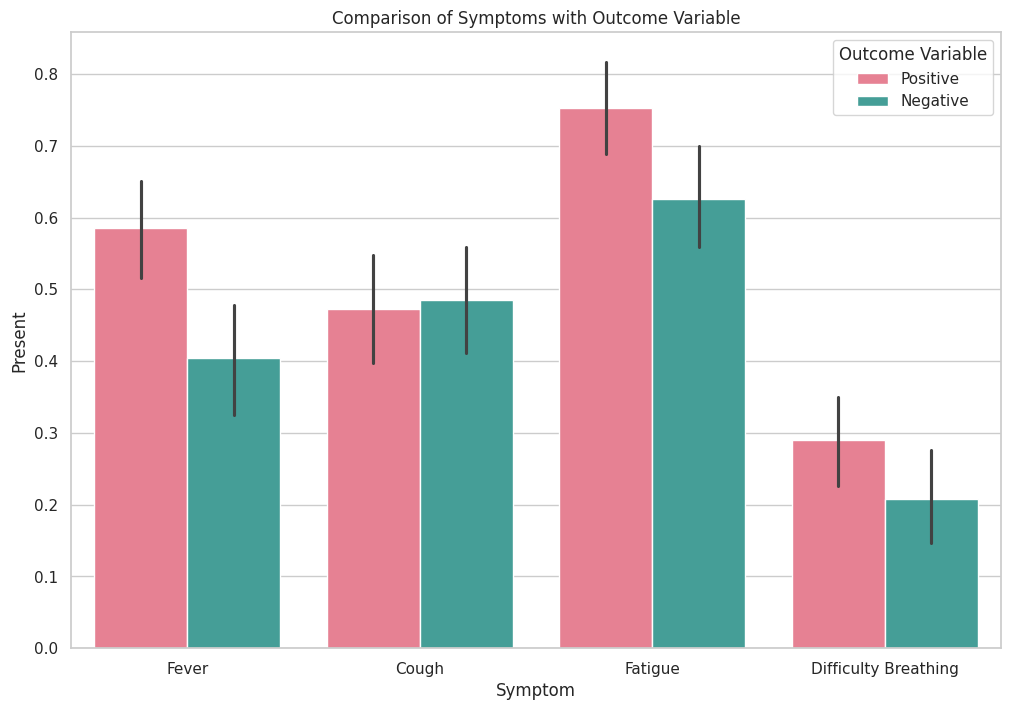

In [26]:
# Create a DataFrame with symptoms and outcome variable
symptoms_df = df[['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Outcome Variable']].copy()

# Convert Yes/No to 1/0 for plotting
symptoms_df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Melt the DataFrame for better plotting
symptoms_melted = symptoms_df.melt(id_vars='Outcome Variable', var_name='Symptom', value_name='Present')

# Grouped bar plot for symptoms related to Outcome Variable
plt.figure(figsize=(12, 8))
sns.barplot(x='Symptom', hue='Outcome Variable', y='Present', data=symptoms_melted , palette="husl")
plt.title('Comparison of Symptoms with Outcome Variable')
plt.show()


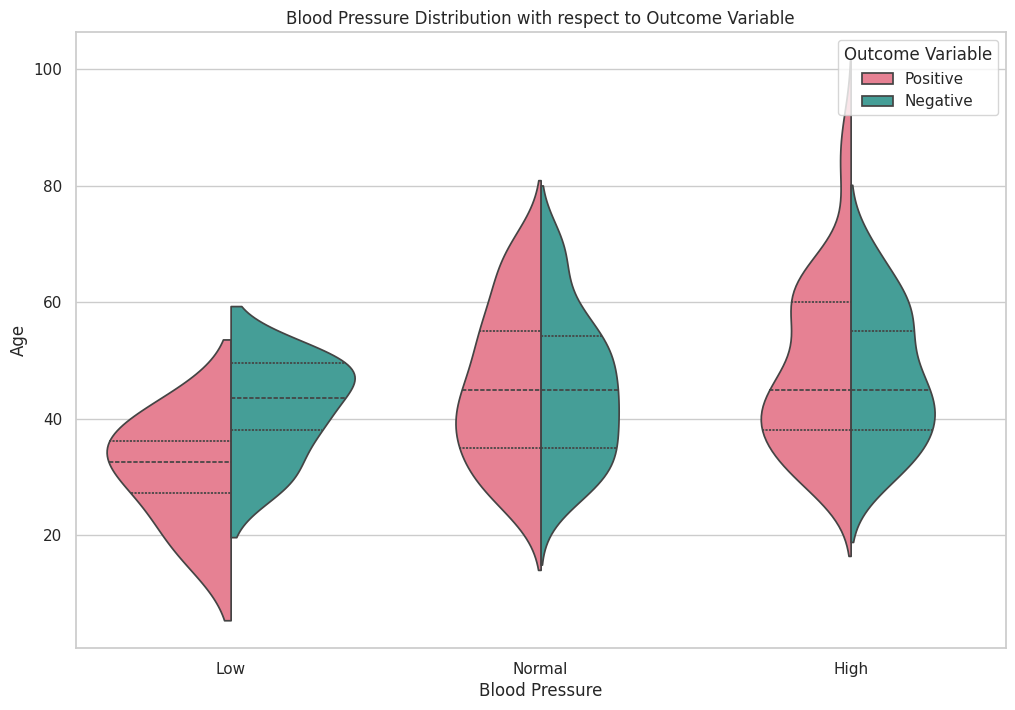

In [27]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Blood Pressure', y='Age', hue='Outcome Variable', data=df, split=True, inner='quart', palette="husl")
plt.title('Blood Pressure Distribution with respect to Outcome Variable')
plt.show()

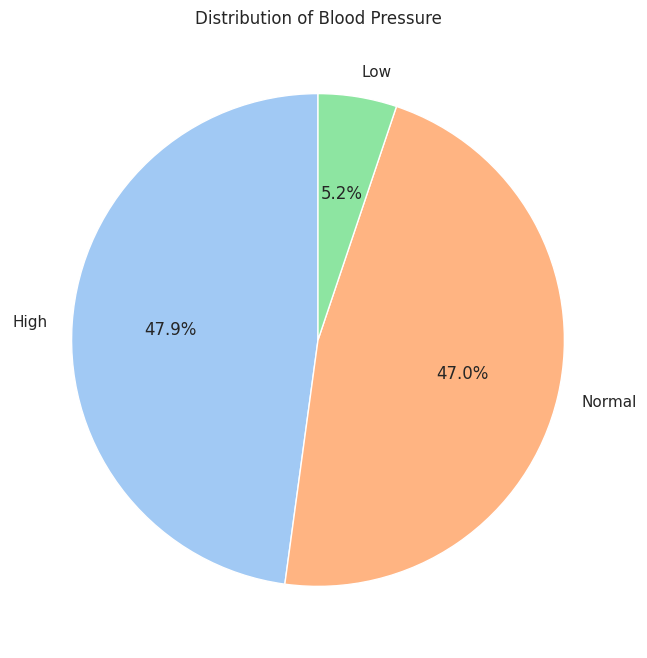

In [28]:
# Count the occurrences of each Blood Pressure level
blood_pressure_counts = df['Blood Pressure'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(blood_pressure_counts, labels=blood_pressure_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Blood Pressure')
plt.show()


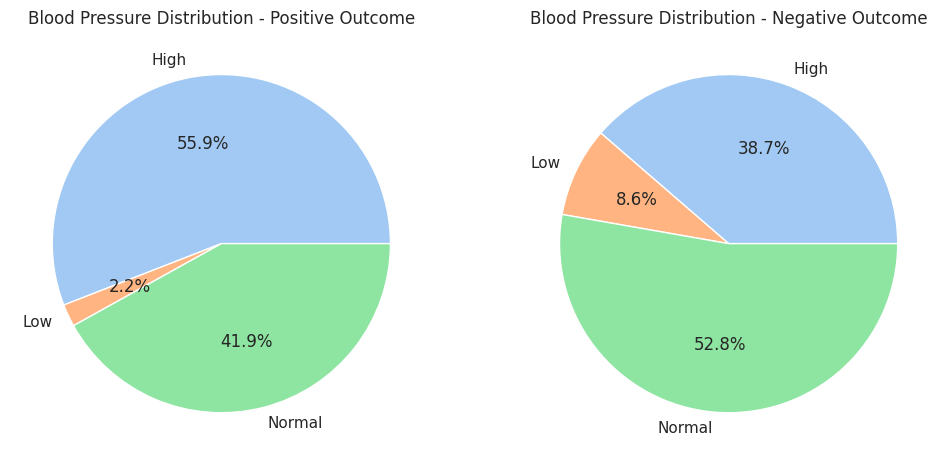

In [29]:
# Count the occurrences of each combination of 'Blood Pressure' and 'Outcome Variable'
blood_pressure_counts = df.groupby(['Blood Pressure', 'Outcome Variable']).size().unstack()

# Plot a pie chart for each 'Outcome Variable'
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Positive Outcome
ax[0].pie(blood_pressure_counts['Positive'], labels=blood_pressure_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
ax[0].set_title('Blood Pressure Distribution - Positive Outcome')

# Negative Outcome
ax[1].pie(blood_pressure_counts['Negative'], labels=blood_pressure_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
ax[1].set_title('Blood Pressure Distribution - Negative Outcome')

plt.show()


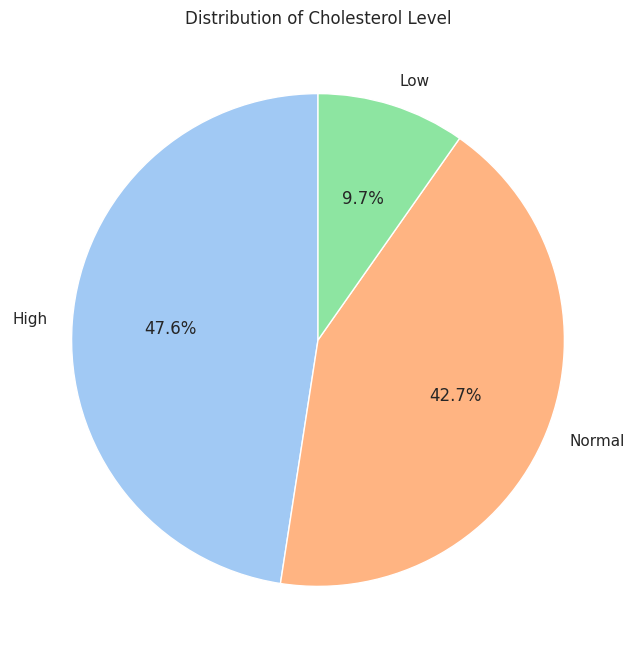

In [30]:
# Count the occurrences of each Cholesterol Level
cholesterol_counts = df['Cholesterol Level'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(cholesterol_counts, labels=cholesterol_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Cholesterol Level')
plt.show()


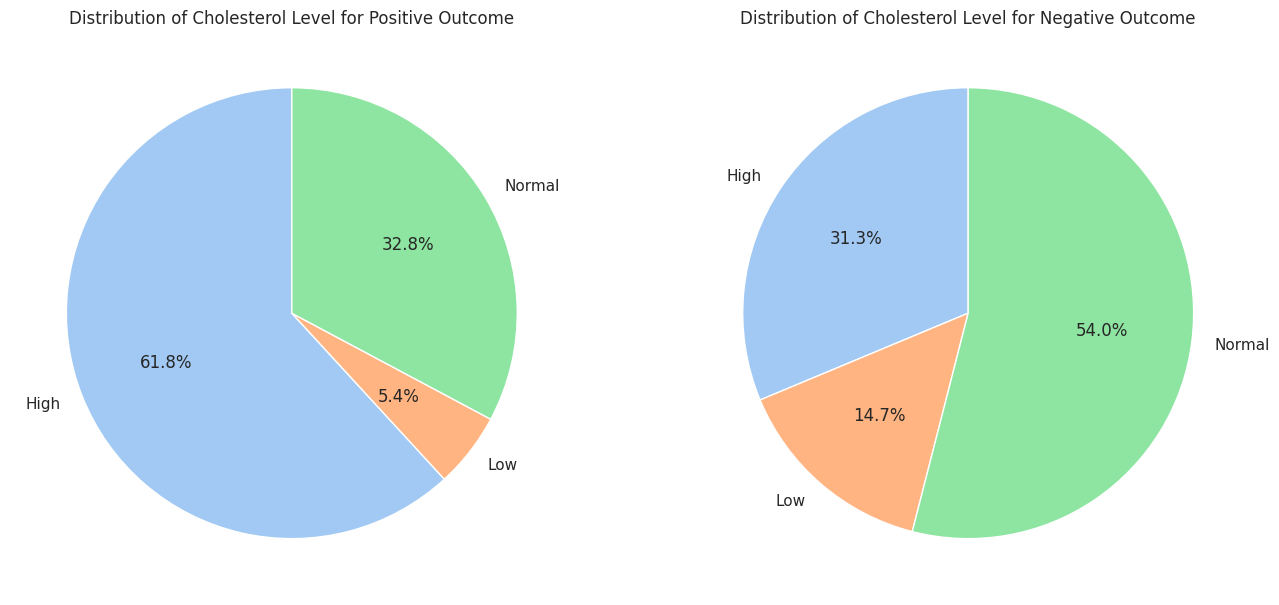

In [31]:
# Count the occurrences of each combination of Cholesterol Level and Outcome Variable
cholesterol_outcome_counts = df.groupby(['Cholesterol Level', 'Outcome Variable']).size().unstack()

# Create a grouped pie plot
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for 'Positive' Outcome
axes[0].pie(cholesterol_outcome_counts['Positive'], labels=cholesterol_outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Distribution of Cholesterol Level for Positive Outcome')

# Plot for 'Negative' Outcome
axes[1].pie(cholesterol_outcome_counts['Negative'], labels=cholesterol_outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Distribution of Cholesterol Level for Negative Outcome')

plt.show()


In [32]:
#droping Disease colunm
df = df.drop('Disease', axis=1)

In [33]:
# Select Outcome Variable as target (y) and others as features (X)
X = df.drop('Outcome Variable', axis=1)
y = df['Outcome Variable']

# Verify the selected features and target variable
print("Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())


Features (X):
  Fever Cough Fatigue Difficulty Breathing  Age  Gender Blood Pressure  \
0   Yes    No     Yes                  Yes   19  Female            Low   
1    No   Yes     Yes                   No   25  Female         Normal   
2    No   Yes     Yes                   No   25  Female         Normal   
3   Yes   Yes      No                  Yes   25    Male         Normal   
4   Yes   Yes      No                  Yes   25    Male         Normal   

  Cholesterol Level  
0            Normal  
1            Normal  
2            Normal  
3            Normal  
4            Normal  

Target Variable (y):
0    Positive
1    Negative
2    Negative
3    Positive
4    Positive
Name: Outcome Variable, dtype: object


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fever                 349 non-null    object
 1   Cough                 349 non-null    object
 2   Fatigue               349 non-null    object
 3   Difficulty Breathing  349 non-null    object
 4   Age                   349 non-null    int64 
 5   Gender                349 non-null    object
 6   Blood Pressure        349 non-null    object
 7   Cholesterol Level     349 non-null    object
dtypes: int64(1), object(7)
memory usage: 21.9+ KB


In [35]:
# Create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the entire dataframe
X_encoded = ordinal_encoder.fit_transform(X)

# Get the column names after transformation
columns_after_transform = list(X.columns)

# Convert the transformed array to a Pandas DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=columns_after_transform)
X_encoded_df.head()



,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0
1,0.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0
2,0.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0
3,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0
4,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0


In [36]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the target variable
y_encoded = label_encoder.fit_transform(y)

# Display the encoded target variable
print("Encoded Target Variable (y):")
y_encoded_df = pd.DataFrame(y_encoded, columns=['Encoded Outcome Variable'])
y_encoded_df.head()

Encoded Target Variable (y):


,Encoded Outcome Variable
0,1
1,0
2,0
3,1
4,1


In [37]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y_encoded_df, test_size=0.2, random_state=42)


# Verify the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (279, 8)
Shape of X_test: (70, 8)
Shape of y_train: (279, 1)
Shape of y_test: (70, 1)


In [38]:
X_train.head(5)

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
228,1.0,1.0,1.0,1.0,15.0,1.0,2.0,2.0
78,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0
90,0.0,0.0,1.0,0.0,7.0,1.0,2.0,0.0
16,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0
66,1.0,1.0,1.0,0.0,7.0,0.0,2.0,2.0


#Machine Learning models

In [39]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fit the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train.values.ravel())  #converting y_train to  1-dimensional array

# Make predictions on the test data
y_pred_GNB = naive_bayes_classifier.predict(X_test)

# Evaluate the performance
accuracy_GNB = accuracy_score(y_test, y_pred_GNB)
conf_matrix_GNB = confusion_matrix(y_test, y_pred_GNB)
class_report_GNB = classification_report(y_test, y_pred_GNB)

# Display the results
print("Accuracy:", accuracy_GNB)
print("\nConfusion Matrix:\n", conf_matrix_GNB)
print("\nClassification Report:\n", class_report_GNB)

Accuracy: 0.5714285714285714

Confusion Matrix:
 [[18 12]
 [18 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        30
           1       0.65      0.55      0.59        40

    accuracy                           0.57        70
   macro avg       0.57      0.57      0.57        70
weighted avg       0.58      0.57      0.57        70



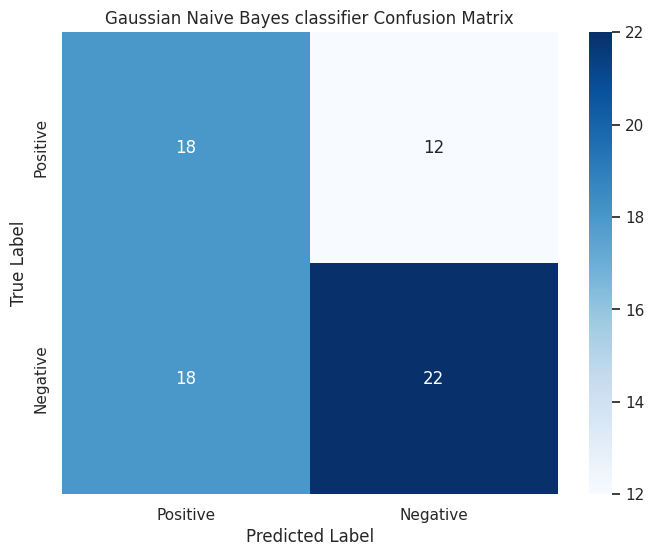

In [40]:
conf_matrix_GNB = confusion_matrix(y_test, y_pred_GNB)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_GNB, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gaussian Naive Bayes classifier Confusion Matrix')
plt.show()

In [41]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=8, algorithm='auto')

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Display the results
print("KNN Accuracy:", accuracy_knn*100)
print("\nKNN Confusion Matrix:\n", conf_matrix_knn)
print("\nKNN Classification Report:\n", class_report_knn)


KNN Accuracy: 64.28571428571429

KNN Confusion Matrix:
 [[21  9]
 [16 24]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.70      0.63        30
           1       0.73      0.60      0.66        40

    accuracy                           0.64        70
   macro avg       0.65      0.65      0.64        70
weighted avg       0.66      0.64      0.64        70



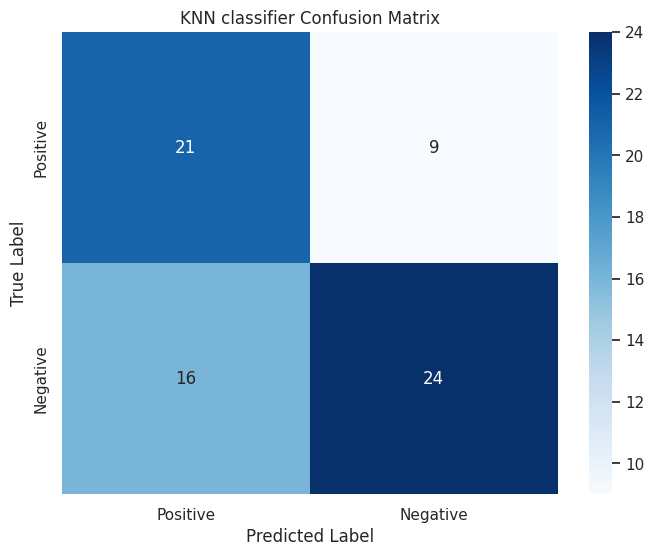

In [42]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',  xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN classifier Confusion Matrix')
plt.show()

In [43]:
# Create an instance of the SVM classifier with default parameters
svm_classifier = SVC( random_state=42)

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train.values.ravel() )

# Make predictions on the test set
y_pred_svc = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
class_report_svc = classification_report(y_test, y_pred_svc)

# Display the performance metrics
print("Accuracy:", accuracy_svc)
print("Confusion Matrix:\n", conf_matrix_svc)
print("Classification Report:\n", class_report_svc)


Accuracy: 0.5857142857142857
Confusion Matrix:
 [[17 13]
 [16 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.57      0.54        30
           1       0.65      0.60      0.62        40

    accuracy                           0.59        70
   macro avg       0.58      0.58      0.58        70
weighted avg       0.59      0.59      0.59        70



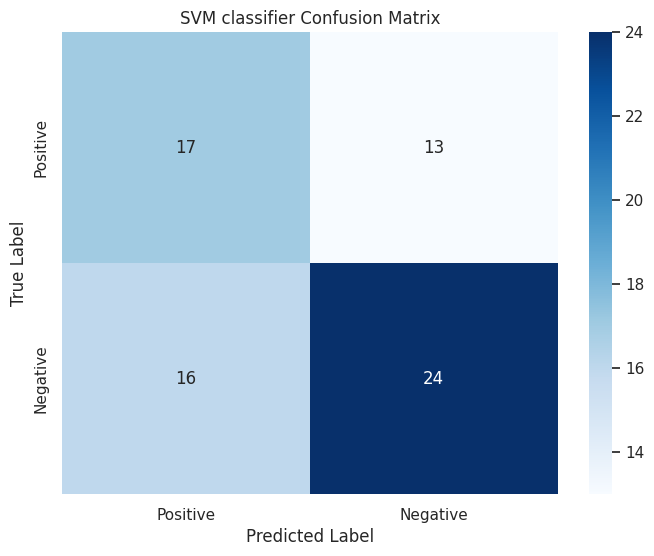

In [44]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_svc)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',  xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM classifier Confusion Matrix')
plt.show()

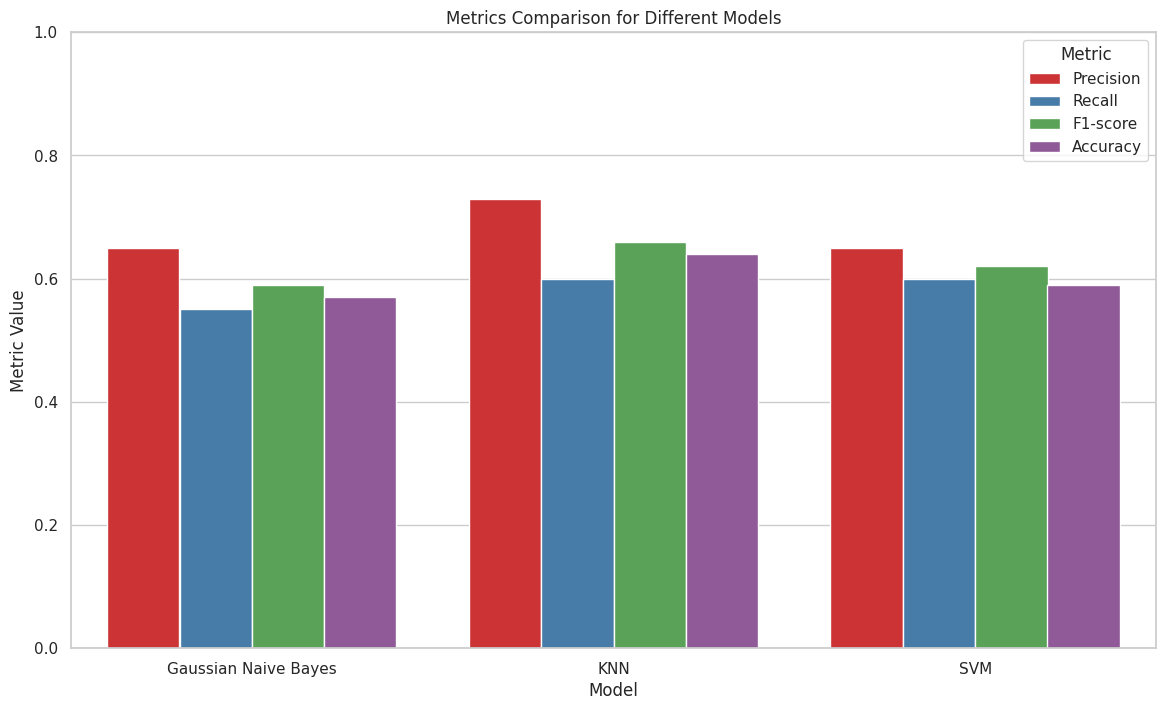

In [45]:
reports = {
    "Gaussian Naive Bayes": class_report_GNB,
    "KNN": class_report_knn,
    "SVM": class_report_svc
}

# Extract precision, recall, and F1-score and accuracy
precision = {}
recall = {}
f1_score = {}
accuracy = {}

for model, report in reports.items():
    lines = report.split('\n')
    precision[model] = float(lines[3].split()[1])
    recall[model] = float(lines[3].split()[2])
    f1_score[model] = float(lines[3].split()[3])
    accuracy[model] = float(lines[5].split()[1])

# Create a DataFrame

data = pd.DataFrame({
    "Model": list(precision.keys()),
    "Precision": list(precision.values()),
    "Recall": list(recall.values()),
    "F1-score": list(f1_score.values()),
    "Accuracy": list(accuracy.values())
})

# Melt the DataFrame
data_melted = pd.melt(data, id_vars="Model", var_name="Metric", value_name="Value")

# Plotting all metrics and accuracy
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Value", hue="Metric", data=data_melted, palette="Set1")
plt.title("Metrics Comparison for Different Models")
plt.ylabel("Metric Value")
plt.ylim(0, 1)
plt.show()